# Problem 10: Proportional hazards

# Part I: How good is the standard error of the mean formula?

Suppose we have $N$ identically distributied normal random variables with mean $\mu_{\textrm{GT}}$ and standard deviation $\sigma_{\textrm{GT}}$.

The maximum likelihood estimate of $\mu$ is $\tilde \mu = 1/N \sum X_i$ (unsurprisingly!).

The maximum likelihood estimate of $\sigma$ is $\tilde{\sigma} = \sqrt{ 1/N \sum \left(X_i - \tilde{\mu}\right)^2}$ (unsurprisingly!). 

In Part I, we will explore the question, What is the uncertainty in $\tilde{\mu}$, the estimate of $\mu$?

The following code generates a sample of $N_{\textrm{obs}}=20$ normal random variables.

In [5]:
NObs <- 20
original_sample <- rnorm(NObs,178.1,12.1)

## Question i
Use nonparametric bootstrap to sample $N_{\textrm{obs}}$ of the original sample. 
Compute the standard deviation of the $\tilde{\mu}$'s.

The standard deviation of $\tilde{\mu}$ is a measure of the uncertainty in the estimate of $\mu$.  

Do this for a range of $N_{\rm obs}$, ranging from 10 to 10000. 
(This is a big loop. If it is slow on your computational machine, feel free to skip, e.g., every 10th or 20th value of $N_{\rm obs}$.) . 
Plot the standard deviation of $\tilde{\mu}$ versus $N$. 

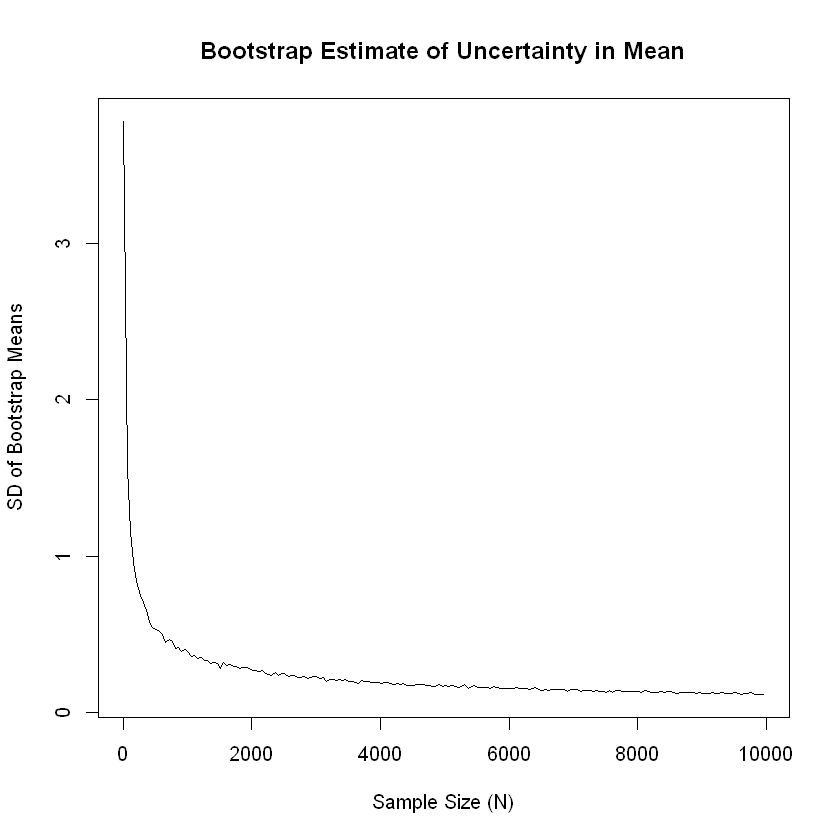

In [ ]:
# the (sqrt)variance in the estimate of the mean -- nonparametric bootstrap
# the ground truth standard deviation of the normal distrubtion
# the standard deviation of the sample
# the (sqrt)variance in the estimate of the mean -- the textbook way, called "SEM"

set.seed(42)
max_size <- 10000
orig <- rnorm(max_size, 178.1, 12.1)

N_vals <- seq(10, 10000, by = 50)
std_devs <- numeric(length(N_vals))
B <- 500

# Loop over different sample sizes
for (i in seq_along(N_vals)) {
  N <- N_vals[i]
  bootstrap_means <- numeric(B)
  
  for (b in 1:B) {
    sample_data <- sample(orig, size = N, replace = TRUE)
    bootstrap_means[b] <- mean(sample_data)
  }
  
  std_devs[i] <- sd(bootstrap_means)
}

# Plot standard deviation of mean vs. sample size
par(bg="white")
plot(N_vals, std_devs, type = "l",
     xlab = "Sample Size (N)", ylab = "SD of Bootstrap Means",
     main = "Standard Deviation v/s Nobs")


## Question ii
In this simple case, according to standard textbooks, there is a formula for the uncertainty in the estimate of $\mu$, called the __standard error of the mean__, which is

$SEM = \hat{\sigma}/\sqrt{N_{\rm obs}}$.

Plot the standard deviation of $\hat{\mu}$ from non-parametric bootstrap versus $N_{\rm obs}$.

On the same axis, plot $\hat{\sigma}/\sqrt{N_{\rm obs}}$ versus $N_{\rm obs}$.

Do they agree?

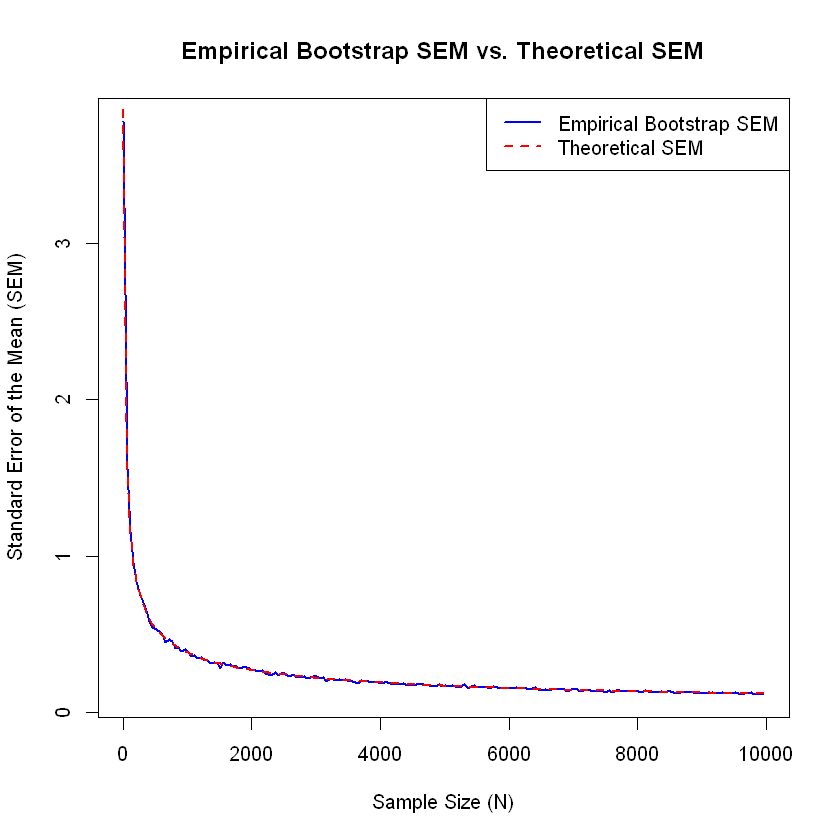

In [ ]:
set.seed(42)
max_size <- 10000
orig <- rnorm(max_size, 178.1, 12.1)

N_vals <- seq(10, 10000, by = 50)
empirical_sem <- numeric(length(N_vals))
B <- 500

# Bootstrap loop to estimate SEM
for (i in seq_along(N_vals)) {
  N <- N_vals[i]
  bootstrap_means <- numeric(B)
  
  for (b in 1:B) {
    sample_data <- sample(orig, size = N, replace = TRUE)
    bootstrap_means[b] <- mean(sample_data)
  }
  
  empirical_sem[i] <- sd(bootstrap_means)  # this is SEM, not SD of data
}

# Plot
par(bg = "white")
plot(N_vals, empirical_sem, type = "l",
     xlab = "Sample Size (N)", ylab = "Standard Error of the Mean (SEM)",
     main = "SEM vs. Nobs")

# Part II: Cox proportional hazards model on breast cancer data


In [8]:
# Install required packages if not already installed
if (!requireNamespace("BiocManager", quietly = TRUE)) {
  install.packages("BiocManager")
}
if (!requireNamespace("curatedBreastData", quietly = TRUE)) {
  BiocManager::install("curatedBreastData")
}
if (!requireNamespace("survival", quietly = TRUE)) {
  install.packages("survival")
}
if (!requireNamespace("ggplot2", quietly = TRUE)) {
  install.packages("ggplot2")
}

In [9]:
# Load required libraries
library(curatedBreastData)
library(survival)
library(ggplot2)
library(dplyr)


Loading required package: XML

Loading required package: ggplot2

Loading required package: impute

Loading required package: Biobase

Loading required package: BiocGenerics

Loading required package: generics


Attaching package: 'generics'


The following objects are masked from 'package:base':

    as.difftime, as.factor, as.ordered, intersect, is.element, setdiff,
    setequal, union



Attaching package: 'BiocGenerics'


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, saveRDS, table, tapply, unique,
    unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain intr

To model an event that happens over time -- for example here, a death due to liver disease or breast cancer -- a powerful modeling framework is the Generalized Poisson Process, where the parameter is a function of time, and is called the hazard rate.
Furthermore, to predict how this depends on covariates, a commonly-used model is the Cox proportional Hazards Model.


## Question i

Learn about the Cox Proportional Hazards Model on wikipedia or elsewhere.
What is the likelihood function of the Cox Proportional Hazards Model?

In [10]:

# likelihood function of the Cox Proportional Hazards Model


## Question ii

Access the following public dataset on breast cancer survival:

In [11]:
# Load the curatedBreastData clinical data
data(clinicalData)

# Extract the clinical data table
clinical_df <- clinicalData$clinicalTable

# Explore survival data availability
cat("Total number of samples:", nrow(clinical_df), "\n")
cat("Samples with Overall Survival (OS) data:", sum(!is.na(clinical_df$OS)), "\n")
cat("Samples with OS months data:", sum(!is.na(clinical_df$OS_months_or_MIN_months_of_OS)), "\n")
cat("Samples with definitive follow-up until death:", sum(!is.na(clinical_df$OS_up_until_death)), "\n")

colnames(clinicalData$clinicalTable)


Total number of samples: 2719 
Samples with Overall Survival (OS) data: 409 
Samples with OS months data: 406 
Samples with definitive follow-up until death: 211 


[1] "dbUniquePatientID"                             
  [2] "study_ID"                                      
  [3] "patient_ID"                                    
  [4] "GEO_GSMID"                                     
  [5] "platform_ID"                                   
  [6] "GEO_platform_ID"                               
  [7] "AE_platform_ID"                                
  [8] "original_study_patient_ID"                     
  [9] "site_ID"                                       
 [10] "site_ID_preprocessed"                          
 [11] "biopsy_preTreat"                               
 [12] "biopsy_postTrt_days"                           
 [13] "pCR_postTrt_days"                              
 [14] "tumor_size_cm_preTrt_preSurgery"               
 [15] "tumor_size_cm_secondAxis_preTrt_preSurgery"    
 [16] "tumor_size_cm_preTrt_preSurgeryMin"            
 [17] "tumor_size_cm_postTrt"                         
 [18] "treatment_protocol_number"                     
 [19] "clinical_AJCC_stage"                           
 [20] "clinical_AJCC_stageRangeMin"                   
 [21] "clinical_AJCC_stageRangeMax"                   
 [22] "preTrt_lymph_node_status"                      
 [23] "postTrt_lymph_node_status"                     
 [24] "preTrt_totalLymphNodes"                        
 [25] "preTrt_numPosLymphNodes"                       
 [26] "preTrt_numPosLymphNodesRemoved"                
 [27] "postTrt_totalLymphNodes"                       
 [28] "postTrt_numPosLymphNodes"                      
 [29] "preTrt_posDichLymphNodes"                      
 [30] "notthingham_prognostic_index"                  
 [31] "tumor_stage_preTrt"                            
 [32] "tumor_stage_preTrtMin"                         
 [33] "tumor_stage_preTrtMax"                         
 [34] "tumor_stage_postTrt"                           
 [35] "pam50"                                         
 [36] "hist_grade"                                    
 [37] "hist_gradeMax"                                 
 [38] "hist_gradeMin"                                 
 [39] "nuclear_grade_preTrt"                          
 [40] "path_diagnosis"                                
 [41] "path"                                          
 [42] "chemosensitivity_prediction"                   
 [43] "pCR"                                           
 [44] "near_pCR"                                      
 [45] "pCR_spectrum"                                  
 [46] "RCB"                                           
 [47] "months_from_surgery_measured_RCB"              
 [48] "months_until_first_event_or_last_checkup"      
 [49] "RFS"                                           
 [50] "RFS_months_or_MIN_months_of_RFS"               
 [51] "DFS"                                           
 [52] "DFS_months_or_MIN_months_of_DFS"               
 [53] "OS"                                            
 [54] "OS_months_or_MIN_months_of_OS"                 
 [55] "OS_up_until_death"                             
 [56] "metastasis"                                    
 [57] "metastasis_months"                             
 [58] "relapseOneYearVsFivePlus"                      
 [59] "metastasis_stage_preTrt"                       
 [60] "dead"                                          
 [61] "died_from_cancer_if_dead"                      
 [62] "age"                                           
 [63] "age_bin_description"                           
 [64] "age_bin"                                       
 [65] "race"                                          
 [66] "nationality"                                   
 [67] "menopausal_status"                             
 [68] "ER_preTrt"                                     
 [69] "ER_percentage_preTrt"                          
 [70] "ER_expr_preTrt"                                
 [71] "ER_fmolmg_preTrt"                              
 [72] "ESR1_preTrt"                                   
 [73] "ERbb2_preTrt"                      

The following code restricts the data to a clean subset with only a few covariates for the purposes of this assignment.

In [12]:
# Create the dataset for analysis
surv_data <- clinical_df %>%
  select(
    OS,
    OS_months_or_MIN_months_of_OS,
    HER2_preTrt,
    age,
  ) %>%
  # Filter to only include complete cases for these key variables
  filter(
    !is.na(OS),
    !is.na(OS_months_or_MIN_months_of_OS),
    !is.na(HER2_preTrt),
    !is.na(age)
  )

# Check how many complete cases we have
cat("\nNumber of complete cases for Cox model:", nrow(surv_data), "\n")

# Convert categorical variables to factors
surv_data$HER2_preTrt <- factor(surv_data$HER2_preTrt)

# Display summary statistics
cat("\nSummary of our filtered dataset:\n")
print(summary(surv_data))


Number of complete cases for Cox model: 127 

Summary of our filtered dataset:
       OS        OS_months_or_MIN_months_of_OS HER2_preTrt      age       
 Min.   :0.000   Min.   :10.00                 0:84        Min.   :29.00  
 1st Qu.:1.000   1st Qu.:40.50                 1:43        1st Qu.:42.00  
 Median :1.000   Median :49.00                             Median :48.00  
 Mean   :0.811   Mean   :49.35                             Mean   :48.05  
 3rd Qu.:1.000   3rd Qu.:62.50                             3rd Qu.:53.00  
 Max.   :1.000   Max.   :87.00                             Max.   :65.00  


How many patients are there in the cleaned dataset?

## Question iii

Use the R function to fit this data to the cox proportional hazards model on the full dataset. 
Plot the mean survival function (which is the complement of the cumulative distribution function of survival times).

Call:
coxph(formula = cox_formula, data = surv_data)

  n= 127, number of events= 103 

                 coef exp(coef) se(coef)     z Pr(>|z|)
HER2_preTrt1 0.275239  1.316845 0.216097 1.274    0.203
age          0.006778  1.006801 0.013181 0.514    0.607

             exp(coef) exp(-coef) lower .95 upper .95
HER2_preTrt1     1.317     0.7594    0.8622     2.011
age              1.007     0.9932    0.9811     1.033

Concordance= 0.521  (se = 0.032 )
Likelihood ratio test= 1.68  on 2 df,   p=0.4
Wald test            = 1.71  on 2 df,   p=0.4
Score (logrank) test = 1.72  on 2 df,   p=0.4



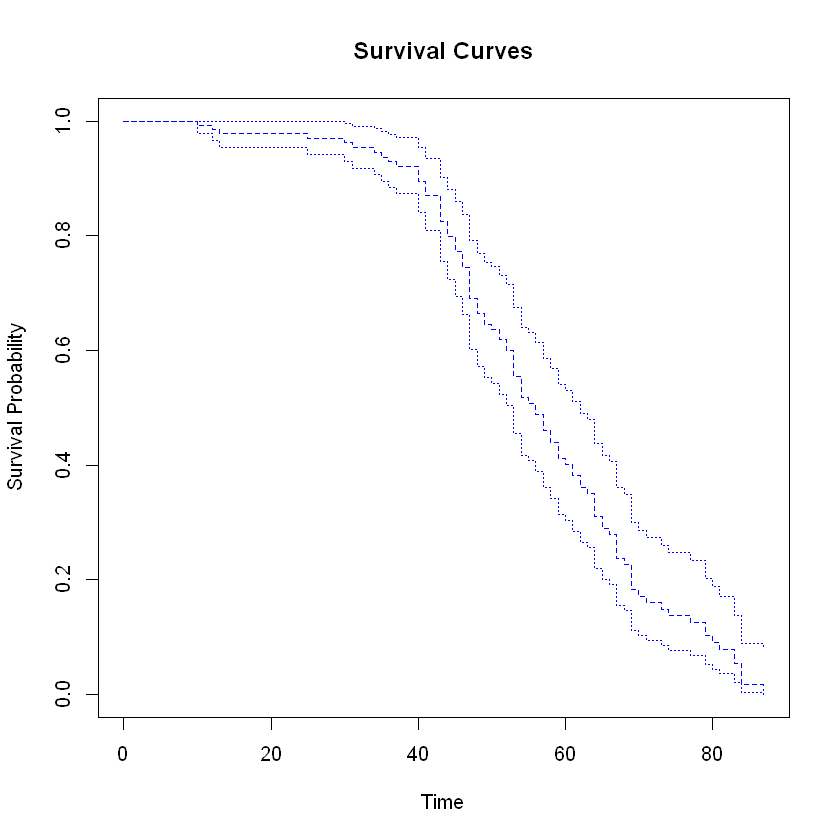

In [13]:

# Fit Cox Proportional Hazards model with the selected variables
cox_formula <- Surv(OS_months_or_MIN_months_of_OS, OS) ~ 
  HER2_preTrt + 
  age

# Initial model fit
initial_cox_model <- coxph(cox_formula, data = surv_data)
print(summary(initial_cox_model))

# Survival curve for average covariates (mean of training set)
sf_mean <- survfit(initial_cox_model)

plot(sf_mean, col = "blue", lty = 2, xlab = "Time", ylab = "Survival Probability",
     main = "Survival Curves")


## Question iv

Suppose a new patient (called `fictitious_patient`) has the following information. 

In [14]:

fictitious_patient <- surv_data[1, , drop = FALSE]  # copy structure
fictitious_patient$HER2_preTrt <- factor("1", levels = levels(surv_data$HER2_preTrt))
fictitious_patient$age <- 45


According to the cox model you learned from the public dataset, what is their 3-year survival probability?

In [15]:
# Survival curve for the fictitious patient
sf_fict <- survfit(initial_cox_model, newdata = fictitious_patient)

three_years_in_months <- 3*12

# Find the closest time point to 3 years in the survival curve
closest_time_idx <- which.min(abs(sf_fict$time - three_years_in_months))
three_year_surv_prob <- sf_fict$surv[closest_time_idx]

cat("\n3-year survival probability for fictitious patient:", 
    round(three_year_surv_prob * 100, 1), "%\n")


3-year survival probability for fictitious patient: 91 %


## Question v

Perform a Bootstrap by repeating the cox learning algorithm, with `n_bootstrap = 200` resamplings of the patient data.
What is the standard deviation of the estimate of the 3-year survival probability? 
Note this is assuming you have data on `nrow(surv_data)` patients.

In [16]:

# Bootstrap with n_bootstrap = 200 and sample_size = nrow(surv_data)


## Question vi

Repeat the Bootstrap but for `sample_sizes <- 50:200`.
How many patient samples would be needed to estimate the Fictitious Patient's 3-year survival probability to within 5%?

In [17]:
# Bootstrap for sample sizes from 50 to 200